In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  

In [2]:
df_m = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/Es_measured.csv',header=None)
df_r = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/Es_real.csv',header=None)
df_m.shape, df_r.shape

((2330, 110), (2330, 100))

In [3]:
X = df_m
y = df_r

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
X_train.shape, X_test.shape, y_train.shape

((1864, 110), (466, 110), (1864, 100))

In [5]:
reg = LinearRegression()         # Instantiate
reg.fit(X_train, y_train)        # Fit the train data

r2_train_score = reg.score(X_train, y_train)   # Calculating R^2 score for train

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')

R^2 score for train dataset =  0.485 



In [6]:
# Finding the predictions of the model for test dataset

y_pred = reg.predict(X_test)

In [7]:
r2_test_score = reg.score(X_test, y_test)   # Calculating R^2 score for test

print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  -787101.5927 



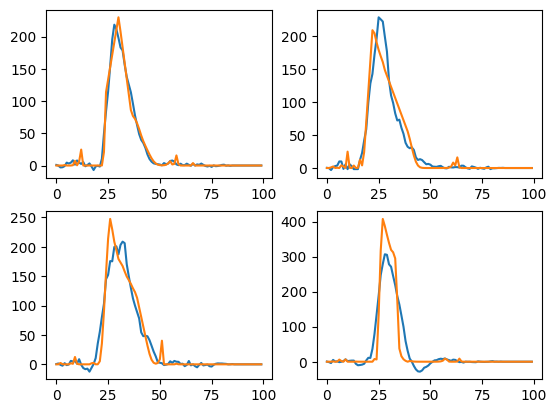

In [8]:
# Plot some results: truth vs prediction
ntest1 = 0 
ntest2 = 100 
ntest3 = 200
ntest4 = 400 
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(y_pred[ntest1,:])
axs[0, 0].plot(y_test.iloc[ntest1,:])
axs[0, 1].plot(y_pred[ntest2,:])
axs[0, 1].plot(y_test.iloc[ntest2,:])
axs[1, 0].plot(y_pred[ntest3,:])
axs[1, 0].plot(y_test.iloc[ntest3,:])
axs[1, 1].plot(y_pred[ntest4,:])
axs[1, 1].plot(y_test.iloc[ntest4,:])


In [9]:
errors = np.zeros(len(y_pred))
for i in np.arange(len(y_pred)):
  yt = y_test.iloc[i,:]
  yp = y_pred[i,:]
  err = yt-yp
  errors[i]=err.abs().mean()/yt.max()
errors.mean()  

0.043743935475251634

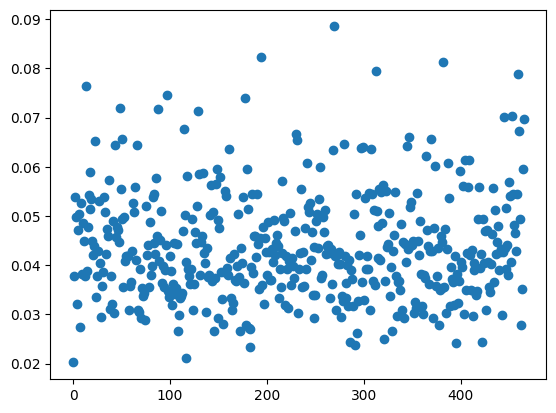

In [11]:
x = np.arange(len(y_pred))
plt.scatter(x, errors)
plt.show()

In [12]:
len(y_pred)

466